# post 반응 웹페이지 데이터 크롤링하기
url : https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&sortColumn=&sortDirection=&infId=7GZ08I0JWSNPY5NVMLLG24313533&infSeq=1&searchWord=%EC%A7%80%ED%95%98%EC%B2%A0#none

In [12]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import requests
import folium
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='D2Coding')
from datetime import datetime, timedelta

In [13]:
# 서울 지하철 승하차량 
# 사용자 입력으로 날짜와 역 받기
input_station_name = input("역 이름을 입력하세요: ")
input_date = input("날짜를 입력하세요 (YYYY-MM-DD): ")
target_date = datetime.strptime(input_date, '%Y-%m-%d')

# 계산된 날짜에 따라 마지막 페이지 계산
base_date = datetime(2022, 1, 1)  # 시작 날짜
days_diff = (target_date - base_date).days
# last_page의 숫자에 따라 환승역의 호선, 날짜가 바뀌는데 정확한 법칙을 아직 완전히 알아내지 못했다....
last_page = 378 - days_diff
targetSite = f'https://data.gg.go.kr/portal/data/sheet/searchSheetData.do?page={last_page}'

print(f"입력한 날짜: {input_date}")
print(f"계산된 마지막 페이지: {last_page}")
print(f"조회 URL: {targetSite}")

request1 = requests.post(targetSite, data={
    'rows': '1',
    'infId': '7GZ08I0JWSNPY5NVMLLG24313533',
    'infSeq': 1,
    'STATN_NM': input_station_name,
    'TKALGHT_DIV_NM' : '승차',
    'STD_DE' : '', 
    'STATN_NO' : '',
    'TM05_PSNCNT' : '',
    'TM06_PSNCNT': '',
    'TM07_PSNCNT': '',
    'TM08_PSNCNT': '',
    'TM09_PSNCNT': '',
    'TM10_PSNCNT': '',
    'TM11_PSNCNT': '',
    'TM12_PSNCNT': '',
    'TM13_PSNCNT': '',
    'TM14_PSNCNT': '',
    'TM15_PSNCNT': '',
    'TM16_PSNCNT': '',
    'TM17_PSNCNT': '',
    'TM18_PSNCNT': '',
    'TM19_PSNCNT': '',
    'TM20_PSNCNT': '',
    'TM21_PSNCNT': '',
    'TM22_PSNCNT': '',
    'TM23_PSNCNT': '',
    'TM24_PSNCNT': ''
})
request2 = requests.post(targetSite, data={
    'rows': '1',
    'infId': '7GZ08I0JWSNPY5NVMLLG24313533',
    'infSeq': 1,
    'STATN_NM': input_station_name,
    'TKALGHT_DIV_NM' : '하차',
    'STD_DE' : '', 
    'STATN_NO' : '',
    'TM05_PSNCNT' : '',
    'TM06_PSNCNT': '',
    'TM07_PSNCNT': '',
    'TM08_PSNCNT': '',
    'TM09_PSNCNT': '',
    'TM10_PSNCNT': '',
    'TM11_PSNCNT': '',
    'TM12_PSNCNT': '',
    'TM13_PSNCNT': '',
    'TM14_PSNCNT': '',
    'TM15_PSNCNT': '',
    'TM16_PSNCNT': '',
    'TM17_PSNCNT': '',
    'TM18_PSNCNT': '',
    'TM19_PSNCNT': '',
    'TM20_PSNCNT': '',
    'TM21_PSNCNT': '',
    'TM22_PSNCNT': '',
    'TM23_PSNCNT': '',
    'TM24_PSNCNT': ''
})
subway1 = request1.json()
print(type(subway1))
print(subway1)
subway2 = request2.json()
print(type(subway2))
print(subway2)

역 이름을 입력하세요: 여의도
날짜를 입력하세요 (YYYY-MM-DD): 2022-01-31
입력한 날짜: 2022-01-31
계산된 마지막 페이지: 348
조회 URL: https://data.gg.go.kr/portal/data/sheet/searchSheetData.do?page=348
<class 'dict'>
{'data': [{'STD_DE': '2022-01-18', 'STATN_NO': 5, 'STATN_NM': '여의도', 'TKALGHT_DIV_NM': '승차', 'TM05_PSNCNT': 78, 'TM06_PSNCNT': 150, 'TM07_PSNCNT': 343, 'TM08_PSNCNT': 538, 'TM09_PSNCNT': 402, 'TM10_PSNCNT': 428, 'TM11_PSNCNT': 685, 'TM12_PSNCNT': 602, 'TM13_PSNCNT': 779, 'TM14_PSNCNT': 996, 'TM15_PSNCNT': 1243, 'TM16_PSNCNT': 1711, 'TM17_PSNCNT': 5476, 'TM18_PSNCNT': 7924, 'TM19_PSNCNT': 2927, 'TM20_PSNCNT': 2722, 'TM21_PSNCNT': 2983, 'TM22_PSNCNT': 552, 'TM23_PSNCNT': 107, 'TM24_PSNCNT': None}], 'total': 378, 'count': 378, 'page': 348, 'rows': 1, 'pages': 378}
<class 'dict'>
{'data': [{'STD_DE': '2022-01-18', 'STATN_NO': 5, 'STATN_NM': '여의도', 'TKALGHT_DIV_NM': '하차', 'TM05_PSNCNT': 109, 'TM06_PSNCNT': 906, 'TM07_PSNCNT': 6419, 'TM08_PSNCNT': 10544, 'TM09_PSNCNT': 3614, 'TM10_PSNCNT': 1251, 'TM11_PSNCNT': 1026,

In [14]:
# 데이터프레임 생성
subway_df1 = pd.json_normalize(subway1['data']) # 승차
print(subway_df1)  # 데이터프레임 내용 출력
print(subway_df1.info())  
subway_df1

subway_df2 = pd.json_normalize(subway2['data']) # 하차
print(subway_df2)  # 데이터프레임 내용 출력
print(subway_df2.info())  
subway_df2

       STD_DE  STATN_NO STATN_NM TKALGHT_DIV_NM  TM05_PSNCNT  TM06_PSNCNT  \
0  2022-01-18         5      여의도             승차           78          150   

   TM07_PSNCNT  TM08_PSNCNT  TM09_PSNCNT  TM10_PSNCNT  ...  TM15_PSNCNT  \
0          343          538          402          428  ...         1243   

   TM16_PSNCNT  TM17_PSNCNT  TM18_PSNCNT  TM19_PSNCNT  TM20_PSNCNT  \
0         1711         5476         7924         2927         2722   

   TM21_PSNCNT  TM22_PSNCNT  TM23_PSNCNT  TM24_PSNCNT  
0         2983          552          107         None  

[1 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STD_DE          1 non-null      object
 1   STATN_NO        1 non-null      int64 
 2   STATN_NM        1 non-null      object
 3   TKALGHT_DIV_NM  1 non-null      object
 4   TM05_PSNCNT     1 non-null      int64 
 5   TM06

,STD_DE,STATN_NO,STATN_NM,TKALGHT_DIV_NM,TM05_PSNCNT,TM06_PSNCNT,TM07_PSNCNT,TM08_PSNCNT,TM09_PSNCNT,TM10_PSNCNT,...,TM15_PSNCNT,TM16_PSNCNT,TM17_PSNCNT,TM18_PSNCNT,TM19_PSNCNT,TM20_PSNCNT,TM21_PSNCNT,TM22_PSNCNT,TM23_PSNCNT,TM24_PSNCNT
0,2022-01-18,5,여의도,하차,109,906,6419,10544,3614,1251,...,702,639,948,1329,562,323,420,137,116,None


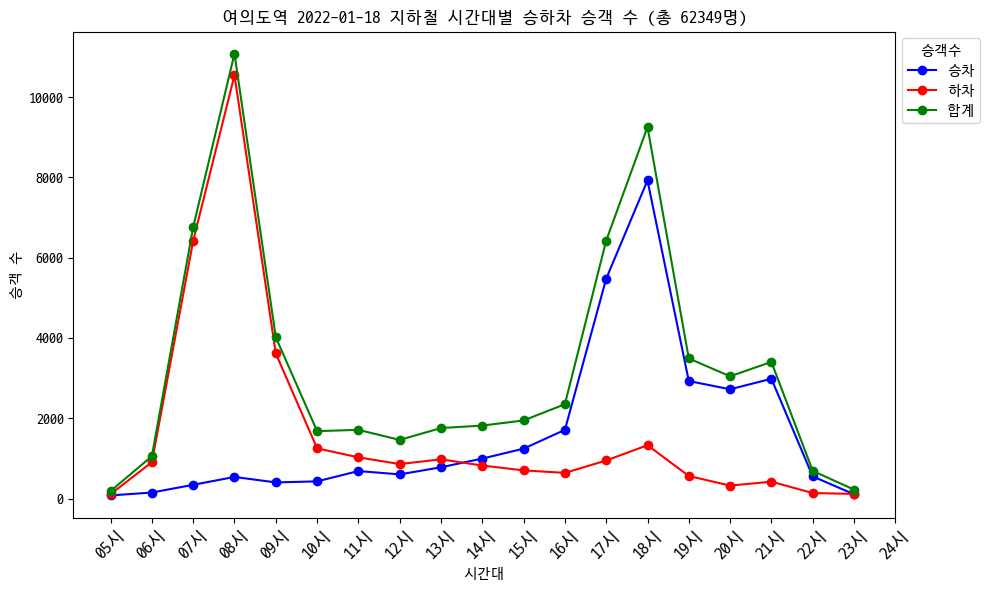

In [16]:
# 열 이름 변경
subway_df1.columns = ['STD_DE', 'STATN_NO', 'STATN_NM', 'DIV', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
subway_df2.columns = ['STD_DE', 'STATN_NO', 'STATN_NM', 'DIV', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']

# 역 이름 추출
desired_station_name = subway_df1.loc[0, 'STATN_NM']
# 날짜 추출
desired_date = subway_df1.loc[0, 'STD_DE']
# 승차 데이터 추출
entry_data = subway_df1.iloc[0, 4:24]
# 하차 데이터 추출
exit_data = subway_df2.iloc[0, 4:24]
# 승차량과 하차량 수를 합한 데이터 생성
total_data = entry_data + exit_data
# 하루 승하차량의 총합
total_passengers = entry_data.sum() + exit_data.sum()

# 시간대별 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(entry_data.index, entry_data, marker='o', label='승차', color='b')
plt.plot(exit_data.index, exit_data, marker='o', label='하차', color='r')
plt.plot(total_data.index, total_data, marker='o', label='합계', color='g')

# x축 인덱스 변경
time_labels = [f'{i:02d}시' for i in range(5, 25)]
plt.xticks(range(len(entry_data)), time_labels, fontsize=12, rotation=45)

plt.title(f'{desired_station_name}역 {desired_date} 지하철 시간대별 승하차 승객 수 (총 {total_passengers}명)')
plt.xlabel('시간대')
plt.ylabel('승객 수')
plt.legend(title='승객수', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# 이후 위도, 경도 공공데이터 csv파일 다운받아 지도로 표시해보기